Titanic Data Science Solutions by Manav Sehgal \
(https://www.kaggle.com/startupsci/titanic-data-science-solutions) \
から引用。

# 流れ
1. 問題提起
2. trainingとtesting dataの読み込み
3. dataの掃除
4. 分析
5. モデリング

## 1. 問題提起
**Goal:** \
test dataのSuriviedのclassifacation \
PassegerIdの生存者(=１)と犠牲者(=0)を識別。

**ドメイン知識** \
1912年4月15日、乗客乗員2224人中1502人が死亡。一つの要因として、ライフボートの不足。　\
だが、女性、子ども、upper-classは生存した傾向が見られる。

> **分析の考え方7選** \
Classifying: サンプルのcategorizing。相関関係の理解 \
Correlationg:  \
Converting: Categorical変数をNumerical変数変数への変換。 \
Completing: dataの欠損値の変換。 \
Correcting:  \
Creating: 既存の変数から新しい変数の作成。 \
Charting: 正しいグラフの作成。

## 2. trainingとtesting dataの読み込み

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**変数がCategoricalなのかNumericalかの識別** 
> この識別は適切なグラフ作成に役立つ。

- **Categorical:** \
    Pclass, Sex, Embarked
- **Numerical:** 
    - **Continious:** Age, Fare
    - **Discrete:** SibSp, Parch


In [6]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leonard, Mr. Lionel",male,1601,G6,S
freq,1,577,7,4,644


### 簡易的に欠損値の無いdataをpivot tableで分析
- Pclass
- Sex
- SibSp
- Parch

In [11]:
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
train_df[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [13]:
train_df[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [14]:
train_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### 生存率
> 男18%、女74% \
SibSp, Parchは相関関係がない \
Pclassはclass 1>2>3で高い

### numerical featuresをグラフ化して分析
- **年齢**

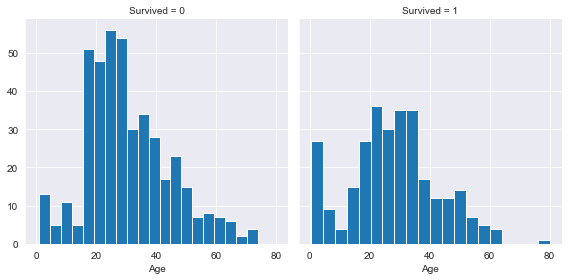

In [15]:
g = sns.FacetGrid(train_df, col='Survived', size=4)
g.map(plt.hist, 'Age', bins=20);

>Age < 4 は高い生存率を示す \
Age = 80 は生存 \
15 - 25　世代で多くが死亡 \
乗客は15 - 35 が多数 \

- **Pclass**

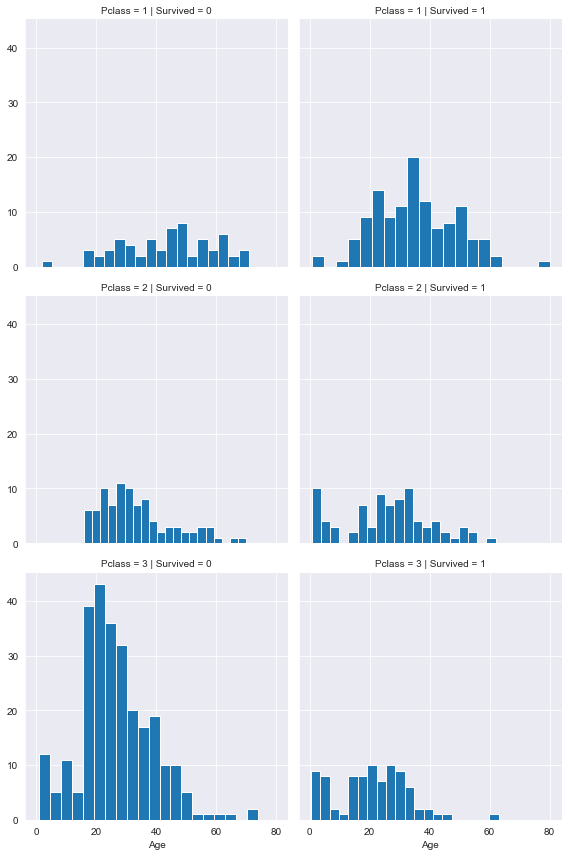

In [16]:
g = sns.FacetGrid(train_df, row='Pclass', col='Survived', size=4)
g.map(plt.hist, 'Age', bins=20);

>Pclass = 3 に多くの乗客が集中したが、高い割合で死亡。 \
Pclass = 2と3の多くの子どもは生存 \
Pclass = 1の多くが生存 \
世代別でPclassに傾向が見える。

- **EmbarkedとPclass**

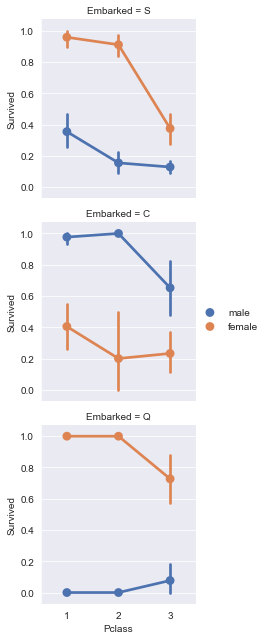

In [17]:
g = sns.FacetGrid(train_df, row='Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend();

>Embarked別に見て、女性の方が男性より高い生存率を示す。\
Embarked = Cを除いて。 これはPclassとEmbarkedの相関を表すかもしれない。そしてPclassとSurvivedにも相関が見える。EmbarkedとSurvivedには直接的な相関関係はない。\
Embarked = C では女性のPclass = 3の方がPclass = 2より、Embarked = Qでは男性のPclass = 3の方がPclass = 2より高い生存率を示す。

- **EmbarkedとFare**

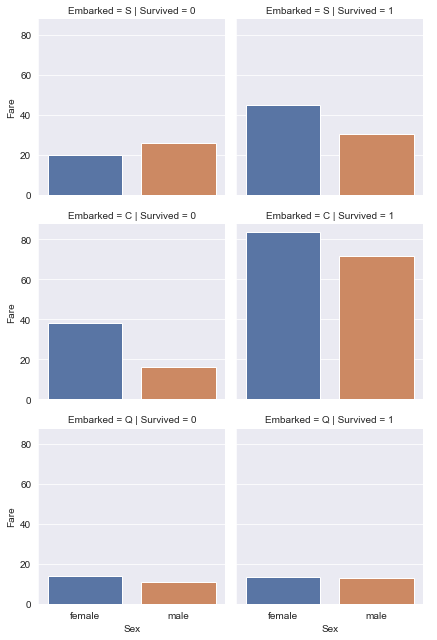

In [18]:
g = sns.FacetGrid(train_df, row='Embarked', col='Survived')
g.map(sns.barplot, 'Sex', 'Fare', palette='deep', ci=None)
g.add_legend();

>高い運賃を支払った乗客の方が高い生存率を示す。 \
EmbarkedとSurvivalに相関関係がある。

## 3. dataの掃除と 4.分析

In [19]:
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

必要ない変数 \
PassengerId, Ticket, Cabin \
を削除

### 欠損値の処理
> train_df: Age177 Embarked 2\
test_df: Age86 Fare 1
### Categorical features を Numerical featuresに変換。
>Categorical: Sex, Embarked

In [20]:
train_df.isna().sum(), test_df.isna().sum()

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Fare          0
 Embarked      2
 dtype: int64, PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Fare            1
 Embarked        0
 dtype: int64)

In [21]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [23]:
for dataset in combine:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

In [24]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [25]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

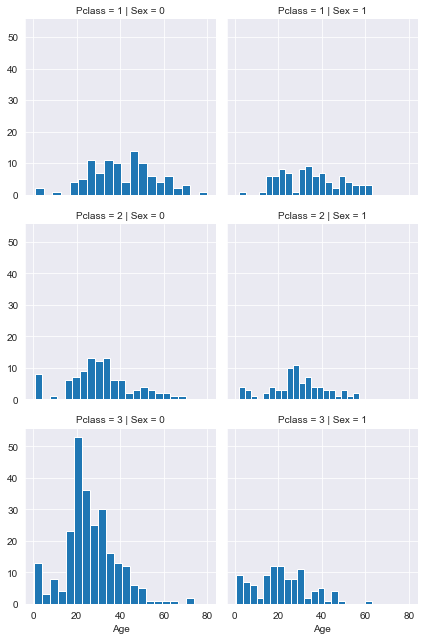

In [26]:
g = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=3)
g.map(plt.hist, 'Age', bins=20);

In [27]:
guess_ages = np.zeros((3,2))

for dataset in combine:
    for i in range(0, 3):
        for j in range(0, 2):
            age_guess = dataset.loc[(dataset['Pclass'] == i+1) & (dataset['Sex'] == j), 'Age'].dropna().median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
            dataset.loc[(dataset['Age'].isna()) & (dataset['Pclass'] == i+1) & (dataset['Sex'] == j), 'Age'] = guess_ages[i,j]

> EmbarkedとFareは欠損値が少ないので、mode()とmedian()で埋める。\
AgeはPclassとSex別のmedian()で埋める。

In [28]:
train_df.isna().sum(), test_df.isna().sum()

(Survived    0
 Pclass      0
 Name        0
 Sex         0
 Age         0
 SibSp       0
 Parch       0
 Fare        0
 Embarked    0
 dtype: int64, PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 Embarked       0
 dtype: int64)

In [29]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

### 新しい変数を作成
- Title
- AgeBand
- FamilySize
- IsAlone
- FareBand
- Age * Pclass

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-z]+)\.', expand=False)
    
    print(dataset['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Ms            1
Countess      1
Capt          1
Sir           1
Mme           1
Lady          1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64


In [31]:
for dataset in combine:
    dataset['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Don', 'Sir', 'Capt', 'Jonkheer', 'Lady', 'Dona'],
                             'Rare',
                             inplace=True)
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)

    print(dataset['Title'].value_counts())

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64


In [32]:
train_df[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [33]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

In [34]:
for dataset in combine:
    dataset.drop('Name', axis=1, inplace=True)

In [35]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby('AgeBand').mean().sort_values(by='Survived', ascending=False)

,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(48.168, 64.084]",0.434783
"(32.252, 48.168]",0.412844
"(16.336, 32.252]",0.336714
"(64.084, 80.0]",0.090909


In [36]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4
    
    dataset['Age'] = dataset['Age'].astype(int)

In [37]:
train_df.drop('AgeBand', axis=1, inplace=True)

In [38]:
for dataset in combine:
    dataset['FamilySize'] = 1 + dataset['SibSp'] + dataset['Parch']
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [39]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean().sort_values(by='Survived', ascending=False)

,Survived
IsAlone,
0,0.505650
1,0.303538


In [40]:
for dataset in combine:
    dataset.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [41]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby('FareBand').mean().sort_values(by='FareBand', ascending=False)

,Survived
FareBand,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


In [42]:
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    
    dataset['Fare'] = dataset['Fare'].astype(int)

In [43]:
train_df.drop('FareBand', axis=1, inplace=True)

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,0,0
1,1,1,1,2,3,1,2,0
2,1,3,1,1,1,0,1,1
3,1,1,1,2,3,0,2,0
4,0,3,0,2,1,0,0,1


In [45]:
for dataset in combine:
    dataset['Age*Pclass'] = dataset['Age'] * dataset['Pclass']

Survivedと相関関係がない変数
- Name
- AgeBand
- SibSp
- Parch
- FamilySize
- FareBand 

を削除

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,0,1,0,0,0,0,3
1,1,1,1,2,3,1,2,0,2
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,3,0,2,0,2
4,0,3,0,2,1,0,0,1,6


In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,0,2,0,2,0,1,6
1,893,3,1,2,0,0,2,0,6
2,894,2,0,3,1,2,0,1,6
3,895,3,0,1,1,0,0,1,3
4,896,3,1,1,1,0,2,0,3


## 5.モデリング
モデリングの種類を減らすため、どのタイプの問題かの理解が必要。
>今回は**Classification**で**Regression**タイプ。 \
= 変数 (Pclass, Sex, Age...) からOutput (Survived or not) の相関関係を特定したい。\
**= Supervised Learnig + Classification + Regression**
- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [48]:
preprocesed_train_df = train_df.copy()
preprocesed_test_df = test_df.copy()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [50]:
X_train = preprocesed_train_df.drop('Survived', axis=1)
y_train = preprocesed_train_df['Survived']
X_test = preprocesed_test_df.drop('PassengerId', axis=1)

### ・ Logistic Regression
Logistic regression measures the relationship between \
the categorical dependent variable (Y) and one or more independent variables (X) \
by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [51]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
acc_log = log.score(X_train, y_train)
acc_log

0.813692480359147

In [52]:
log.coef_

array([[-1.20267503,  2.20208715, -0.47096085, -0.07255172,  0.27696478,
         0.4054604 ,  0.18420161, -0.04900403]])

In [53]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone',
       'Age*Pclass'],
      dtype='object')

In [54]:
coeff_df = pd.DataFrame(index=X_train.columns, columns=['Coefficient'])
coeff_df['Coefficient'] = log.coef_.transpose()
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Sex,2.202087
Title,0.405460
Embarked,0.276965
IsAlone,0.184202
Age*Pclass,-0.049004
Fare,-0.072552
Age,-0.470961
Pclass,-1.202675


> Sex(2.20)がGoal(Survived)へ最も影響を与えている。次点でPclass(-1.20) \
Age*PclassとFareは0に近いのでSurvuvedの要因にはならない。

###  ・Support Vector Machine
Supervised Learning Model \
ClassificationとRegression問題

In [55]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, y_train)
acc_svc

0.8282828282828283

### ・K-Nearest Neighbors
 ClassificationとRegression問題
>**長所**
    - simple
    - どんな数でも使える
    - dataを足しても良い
    - parameterが少ない(K, Distance metric) \
**短所**
    - 予測に時間がかかるため、データが多いと不向き
    - 高次元変数ではうまくいかない。(eg. x**n)
    - Categorical変数ではうまくいかない。


In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, y_train)
acc_knn

0.8395061728395061

### ・Naive Bays
> 

In [57]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, y_train)
acc_gaussian

0.7687991021324355

### ・Perceptron (= Neural Network)
Supervised Learning 
>Activation func 
- sigmoid \
    0 < z < 1 (Binary classification) 
- Hyperbolic Tangent \
    -1 < z < 1 (Binary Classification) 
- Rectified Linear Unit (ReLU) (Vanishing gradient)
    

In [58]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = perceptron.score(X_train, y_train)
acc_perceptron

0.7497194163860831

### ・Linear SVC

In [59]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = linear_svc.score(X_train, y_train)
acc_linear_svc

0.7946127946127947

### ・Stochastic Gradient Descent

In [60]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = sgd.score(X_train, y_train)
acc_sgd

0.7934904601571269

### ・Decision Tree

In [61]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree

0.8664421997755332

### ・Random Forest

In [62]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = random_forest.score(X_train, y_train)
acc_random_forest

0.8664421997755332

## 結果

In [63]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.866442
8,Decision Tree,0.866442
1,KNN,0.839506
0,Support Vector Machines,0.828283
2,Logistic Regression,0.813692
7,Linear SVC,0.794613
6,Stochastic Gradient Decent,0.793490
4,Naive Bayes,0.768799
5,Perceptron,0.749719


> Random ForestとDecision Treeが同じ点数なので、\
過学習になりやすいDecision Tree を正すRandom Forest を使用